In [2]:
import pandas as pd
import numpy as np

In [4]:
f = '../data/text_cat.xlsx'
D = pd.read_excel(f)

In [5]:
D.head()

,category_id,category_name,body
0,5,Accessori Auto,Pompa Iniezione Renault 1.9 DCI Codice: 044501...
1,26,\tOfferte di lavoro,\tCerchiamo un AGENTE IMMOBILIARE JUNIOR da in...
2,3,Moto e Scooter,"Motore ottimo, parabrezza opacizzato, mai caduto."
3,29,\tVille singole e a schiera,\tCOSSATO - Vendiamo due unità immobiliari ind...
4,42,\tCandidati in cerca di lavoro,"\tSalvemi chiamo Fabiana ho 18 anni, cerco lav..."


In [6]:
import spacy

In [7]:
nlp = spacy.load("it_core_news_sm")

In [8]:
def proc(text, model, pos_list=None):
    try:
        t = text.lower().replace("'", " ")
        doc = nlp(t)
        if pos_list is not None:
            tokens = [x.lemma_ for x in doc if x.pos_ in pos_list]
        else:
            tokens = [x.lemma_ for x in doc]
    except:
        tokens = []
    return tokens

In [9]:
from collections import defaultdict

In [10]:
I = defaultdict(lambda: defaultdict(lambda: 0))

In [11]:
for i, row in D.iloc[:1000].iterrows():
    tokens = proc(row.body, model=nlp, pos_list=['NOUN', 'VERB'])
    for token in tokens:
        I[token][i] += 1

In [44]:
T = pd.DataFrame(I).fillna(0)

In [45]:
T.head()

,pompare,iniezione,renault,codice,posizione,applicabilità,laguna,ricambio,inserzionati,essere,...,kevlar,cupolino,copriserbatoio,domanda,info@motoxpricambi.com,chat,statistico,cinzia,olivetti,collezionisti-.chiamate
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
docs, dictionary = list(T.index), list(T.columns)

In [47]:
T = (T.T / T.max(axis=1)).T

In [48]:
T.head()

,pompare,iniezione,renault,codice,posizione,applicabilità,laguna,ricambio,inserzionati,essere,...,kevlar,cupolino,copriserbatoio,domanda,info@motoxpricambi.com,chat,statistico,cinzia,olivetti,collezionisti-.chiamate
0,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
idf = {}
for word in T.columns:
    idf[word] = np.log(T.shape[0] / len(np.where(T[word] > 0)[0]))

In [65]:
tfidf = defaultdict(lambda: defaultdict(lambda: 0))
for i, row in T.iterrows():
    for column, weight in row.items():
        if weight > 0:
            tfidf[i][column] = weight * idf[column]
        else:
            pass

In [82]:
TD = pd.DataFrame(tfidf).fillna(0).T

In [83]:
TD.head()

,$,-amplificatore,-ancora,-anno,-cambio,-camera,-caricatore,-costituiranno,-display,-flessibilità,...,zuccherare,|,¤,¤.,¤/cad,¤100,¤12!tenuta,"¤30,00",®,°
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=2)

In [73]:
V = pca.fit_transform(TD)

In [74]:
import matplotlib.pyplot as plt

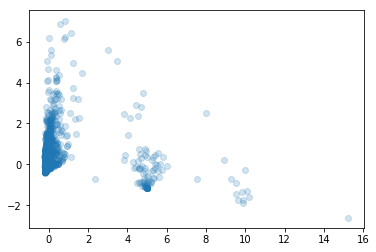

In [76]:
fig, ax = plt.subplots()
ax.scatter(V[:,0], V[:,1], alpha=0.2)
plt.show()

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# SEARCH

In [104]:
sim = cosine_similarity(qiv.reshape(1, -1), TD)

In [101]:
q = ['renault', 'ricambio', 'veicolo']
qi = [idf[x] for x in q]

In [103]:
qiv = np.zeros(len(TD.columns))
for w in q:
    iw = list(TD.columns).index(w)
    qiv[iw] = idf[w]

In [112]:
D.loc[696].body

'Motore Renault CLIO 1.9 DTI F9Q H7 usato con 113.000 km'

In [105]:
R = dict((i, score) for i, score in enumerate(sim[0]))

In [106]:
for doc, score in sorted(R.items(), key=lambda x: -x[1]):
    print(doc, score)

0 0.30885168291476733
856 0.26284846358872044
695 0.24846832953567505
951 0.23058555039577153
432 0.22363064579030115
460 0.21754972202105113
88 0.20223868690194546
63 0.16890992498239052
863 0.16021812792781706
779 0.14591510939856495
577 0.14213715674093627
692 0.1280715903041519
981 0.12210989419099555
512 0.11052907404257527
789 0.10537683940067223
774 0.1007404774885206
43 0.09579682241569126
803 0.09114450899440037
451 0.08956578852867748
198 0.08316472707178042
219 0.0823363424853053
218 0.08013384895767998
339 0.0739798320816727
235 0.0723943163802778
328 0.07143620801487731
239 0.06490649855884427
64 0.06376972298982048
152 0.05678537968865415
126 0.05562386666264354
706 0.054405997007638804
106 0.05330888369858324
702 0.05307192507344495
272 0.05219542071018247
273 0.05219542071018247
277 0.05219542071018247
289 0.05219542071018247
293 0.05219542071018247
294 0.05219542071018247
313 0.05219542071018247
320 0.05219542071018247
462 0.05219542071018247
261 0.0513190788175469
269

In [111]:
TD.index[695]

696

# CLASSIFICATION

In [121]:
categories = [D.loc[x].category_id for x in TD.index]
V = pca.fit_transform(TD)

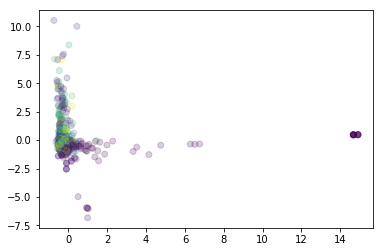

In [123]:
fig, ax = plt.subplots()
ax.scatter(V[:,0], V[:,1], alpha=0.2, c=categories)
plt.show()

In [126]:
from sklearn.naive_bayes import GaussianNB

In [128]:
k = GaussianNB()
prediction = k.fit(TD, categories).predict(TD)

In [130]:
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable


def cm_plot(ax, classes, CM, title, figure):
    im = ax.imshow(CM, interpolation='nearest', cmap=plt.cm.Blues)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    figure.colorbar(im, cax=cax, orientation='vertical')
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=90, fontsize=12)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=0, fontsize=12)
    ax.set_title(title, fontsize=16)
    thresh = CM.max() / 2.
    for i, j in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
        ax.text(j, i, CM[i, j], horizontalalignment="center",
                 color="white" if CM[i, j] > thresh else "black", fontsize=12)
    ax.set_ylabel('True label', fontsize=16)
    ax.set_xlabel('Predicted label', fontsize=16)

In [131]:
import sklearn.metrics as mx

In [133]:
cm = mx.confusion_matrix(categories, prediction)

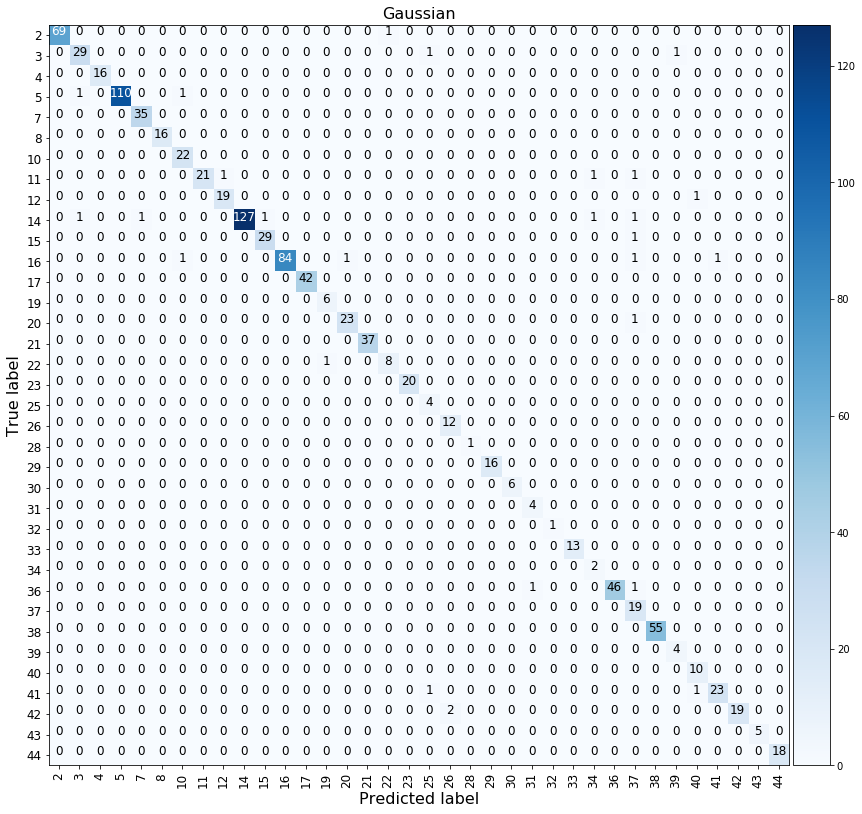

In [135]:
fig, ax = plt.subplots(figsize=(14,14))
cm_plot(ax, list(set(categories)), cm, 'Gaussian', fig)
plt.show()

In [152]:
D[D.category_id==23].head(2)

,category_id,category_name,body
42,23,\tAnimali,\tVendo coppia 2019 di fife fancy per cessata ...
100,23,\tAnimali,\tLa sua famiglia dice che non riesce a gestir...


In [154]:
q = nlp('vendo gatti di razza con renault e ricambi')
q = [x.lemma_ for x in q]
qiv = np.zeros(len(TD.columns))
for w in q:
    try:
        iw = list(TD.columns).index(w)
        qiv[iw] = idf[w]
    except:
        pass

In [155]:
qiv

array([0., 0., 0., ..., 0., 0., 0.])

In [156]:
k.predict(qiv.reshape(1, -1))

array([5])

In [157]:
k.predict_proba(qiv.reshape(1, -1))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])